<a id="top"></a>
# データの可視化

ここではデータ可視化で用いられるmatplotlib,seabornの基本操作について学んでいきます。<br>
グラフにしてデータを可視化することで、データの傾向や推移などを視覚的にわかりやすくできます。<br>
また、分析結果を分かりやすいグラフにすることで、分析に携わってない人にも結果が伝わりやすくなります。

なお、今回は必要ライブラリが使用するPython環境にインストールされている前提で進みます。

## 目次
[1. ライブラリのインポート](#import)<br>
[2. データの読み込み](#read)<br>
[3. グラフの描画](#graph)<br>
[4. で、何が一番いいの？](#which)

<a id="import"></a>
### 1. ライブラリのインポート
さっそくライブラリをインポートしましょう。以下のコードを使ってインポートします。

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<a id="read"></a>
### 2. データの読み込み

前回同様、株価のデータを読み込みます。

In [2]:
dir_path = "./data/"
train_df = pd.read_csv(dir_path + "train.csv")
test_df = pd.read_csv(dir_path + "test.csv")

<a id="graph"></a>
### 3. グラフの描画

ここでは株価や上昇の有無を例にとり、棒グラフや折れ線グラフを表示していきます。

上昇の有無について、0と1の個数を集計して棒グラフで表現していきます。<br>
分類されているデータの集計は以下のコードで行えます。
```Python
df.groupby('<集約したいデータの列名>')['<集約したいデータの列名>'].count()
```

まず、集約したいデータをgroupbyメソッドを用いて、その列名を指定することで集約します。<br>
そして、sizeメソッドでデータの個数を集計します。

In [3]:
train_df.head()

,Date,Open,High,Low,Close,Up
0,2004-01-02,50.85,50.91,50.62,50.72,1
1,2004-01-05,50.75,50.84,50.61,50.79,1
2,2004-01-06,50.87,51.26,50.86,51.15,1
3,2004-01-07,51.45,51.54,51.29,51.51,0
4,2004-01-08,51.15,51.33,51.02,51.28,0


In [4]:
# up = train_df.groupby('Up')['Up'].count()
up = train_df.groupby('Up').size()
up

Up
0     981
1    1045
dtype: int64

この集計したデータを用いて、グラフを描画していきます。

In [5]:
print(up.index)

Index([0, 1], dtype='int64', name='Up')


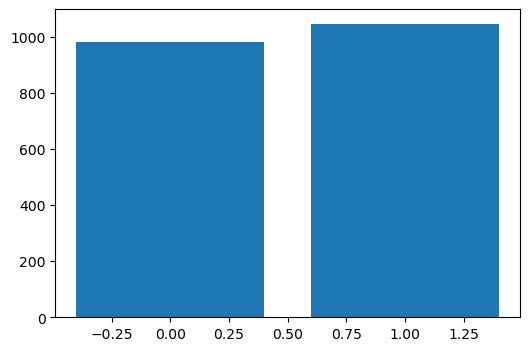

In [8]:
# matplotlib
plt.figure(figsize=(6, 4))
plt.bar(up.index, up.values)
plt.show()

up.indexは0か1のint型でしたが、0.25刻みの数目盛りが表示されていて<br>
せっかく可視化したのに何を表したいかがわかりづらいです。<br>
少し修正します。

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar([str(x) for x in up.index], up.values)
plt.show()

up.indexをint型からstr型に変更し、0と1のみが表示されるようになりました。

次はPandasを用いて、棒グラフを書いてみます。

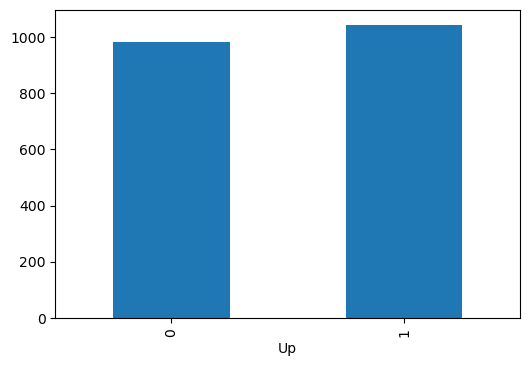

In [13]:
# pandasで描画
up.plot(kind="bar", figsize=(6, 4))
plt.show()

今度は文字が寝ていて見づらいです。<br>
少し修正します。

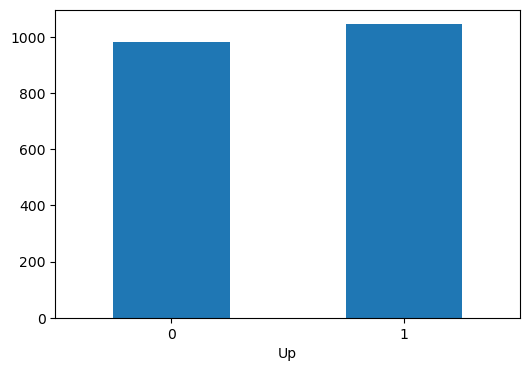

In [14]:
up.plot(kind="bar", figsize=(6, 4))
plt.xticks(rotation=0)
plt.show()

文字が起きて見やすくなりました。

次はPandasを用いて、棒グラフを書いてみます。

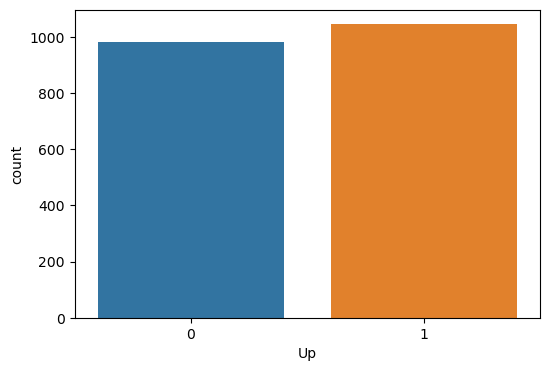

In [15]:
# seabornで描画
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Up')
plt.show()

seabornだと自動で棒の色分け、軸ラベルの設定がされました。



次にx軸を日付、y軸をその日の終値の折れ線グラフを描画します。

まずは日付がobject型になっているので、datetime型に変換します。

In [28]:
df = pd.concat([train_df, test_df], ignore_index=True)
df['Date'] = pd.to_datetime(df['Date'])

データが2004年からあり多いので、2019年を抽出します。

In [29]:
df_2019 = df[df['Date'].dt.year == 2019]
df_2019

,Date,Open,High,Low,Close,Up
3076,2019-01-03,168.24,169.02,167.43,167.81,NaN
3077,2019-01-04,168.68,171.15,168.41,170.43,NaN
3078,2019-01-07,172.13,175.05,172.13,173.75,NaN
3079,2019-01-08,173.36,173.62,171.76,172.30,NaN
3080,2019-01-09,171.05,171.32,169.98,170.84,NaN
...,...,...,...,...,...,...
3221,2019-12-17,185.52,186.40,184.62,184.68,NaN
3222,2019-12-18,183.86,184.01,182.38,183.10,NaN
3223,2019-12-19,183.83,185.17,183.66,185.08,NaN
3224,2019-12-20,186.29,186.64,184.81,185.19,NaN


抽出できました。
いよいよ描画です。

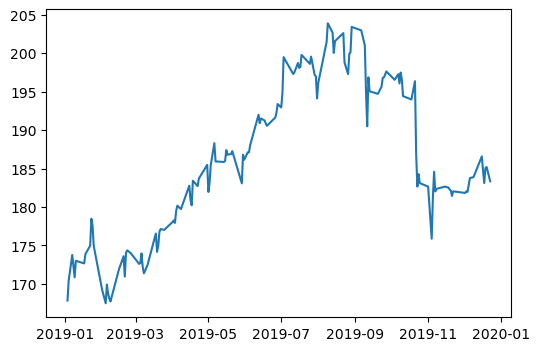

In [30]:
# matplotlibで描画
plt.figure(figsize=(6, 4))
plt.plot(df_2019['Date'], df_2019['Close'])
plt.show()

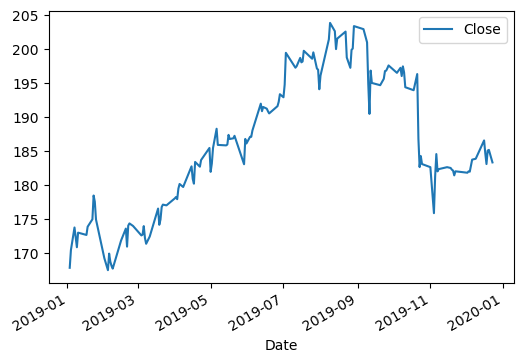

In [34]:
# Pandasで描画
df_2019.plot(kind="line", x='Date', y='Close', figsize=(6, 4))
plt.show()

c:\Users\Public\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Public\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


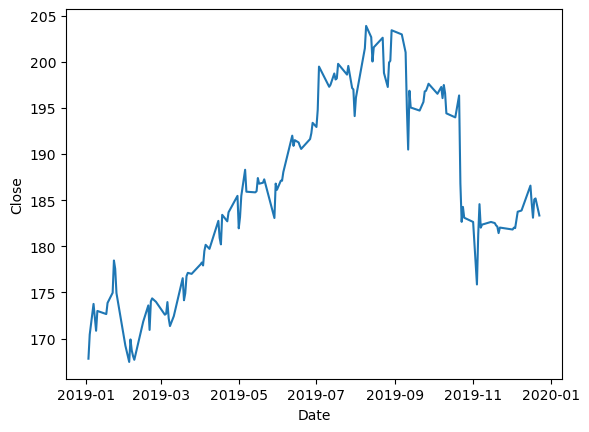

In [35]:
# seabornで描画
sns.lineplot(x='Date', y='Close', data=df_2019)
plt.show()

<a id="which"></a>
### 4. で、何が一番いいの？

結論、matplotlibが一番使われます。今回紹介したグラフ以外にも、箱ひげ図や散布図等の様々なグラフがあります。<br>
また、凡例や軸ラベルの設定、色の調整等、グラフの体裁を整える設定もあります。<br>
matplotlibが不自由なく使えれば、データの可視化で困ることはないでしょう。

[Topに戻る](#top)